## Step 3: Replication

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import os

In [3]:
from datetime import date

In [4]:
pip install pandas_ta

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas_ta as ta

# Selected fund: ECH

In [7]:
#Download data for period. Dates set according to comment re SMA on under '2.6 Data Cleaning'
#ECH is the iShares MSCI Chile ETF and IVV is the comparative S&P500 iShares ETF

tickers = ['ECH', 'IVV']
start = datetime.date(2009,1,1)
end = datetime.date(2020,1,1)

In [8]:
# In order to minimize Yahoo Finance calls, a Pandas DataFrame is saved externally to CSV file:
if os.path.exists("tickers.csv"):
    ticker_data = pd.read_csv("tickers.csv", parse_dates=True, index_col=0)
else:
    ticker_data = yf.download(tickers, start, end, auto_adjust = False)['Adj Close']

    #save for future use
    ticker_data.to_csv("tickers.csv")

In [9]:
# In order to minimize Yahoo Finance calls, a Pandas DataFrame is saved externally to CSV file:
if os.path.exists("ech.csv"):
    ech_data = pd.read_csv("ech.csv", parse_dates=True, index_col=0)
else:
    ech_data = yf.download("ECH", start, end, multiple_index_value = False)

    #save for future use
    ech_data.to_csv("ech.csv")

In [10]:
ech_data.head()

,Close,High,Low,Open,Volume
Date,,,,,
2009-01-02,20.624191,20.624191,20.046578,20.046578,45600
2009-01-05,20.590204,20.807660,20.488273,20.807660,56600
2009-01-06,21.303732,21.487209,21.065891,21.460027,113900
2009-01-07,21.059095,21.650300,20.970755,21.650300,9400
2009-01-08,21.249367,21.249367,20.997935,21.004730,14600


In [11]:
ticker_data.head()

,ECH,IVV
Date,,
2009-01-02,20.624191,68.957314
2009-01-05,20.590204,68.779854
2009-01-06,21.303732,69.216072
2009-01-07,21.059095,67.182709
2009-01-08,21.249367,67.478500


In [12]:
# Implement class label Gamma as per Sec 2.1 of the paper 

ticker_data['Gamma_ech'] = ticker_data['ECH']-ticker_data['ECH'].shift(1)
ticker_data.iloc[0,2] = 0
ticker_data['GE'] = ticker_data['Gamma_ech'].apply(lambda x: '1' if x > 0 else '-1')
ticker_data.head()

,ECH,IVV,Gamma_ech,GE
Date,,,,
2009-01-02,20.624191,68.957314,0.000000,-1
2009-01-05,20.590204,68.779854,-0.033987,-1
2009-01-06,21.303732,69.216072,0.713528,1
2009-01-07,21.059095,67.182709,-0.244637,-1
2009-01-08,21.249367,67.478500,0.190271,1


In [13]:
#To gain insight into the DataFrame used in the research paper, we implement the two most prominent TA library technical indicators to expand dataset

ech_data.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [14]:
help(ta.obv)

Help on function obv in module pandas_ta.volume.obv:

obv(close, volume, talib=None, offset=None, **kwargs)
    On Balance Volume (OBV)

    On Balance Volume is a cumulative indicator to measure buying and selling
    pressure.

    Sources:
        https://www.tradingview.com/wiki/On_Balance_Volume_(OBV)
        https://www.tradingtechnologies.com/help/x-study/technical-indicator-definitions/on-balance-volume-obv/
        https://www.motivewave.com/studies/on_balance_volume.htm

    Calculation:
        signed_volume = signed_series(close, initial=1) * volume
        obv = signed_volume.cumsum()

    Args:
        close (pd.Series): Series of 'close's
        volume (pd.Series): Series of 'volume's
        talib (bool): If TA Lib is installed and talib is True, Returns the TA Lib
            version. Default: True
        offset (int): How many periods to offset the result. Default: 0

    Kwargs:
        fillna (value, optional): pd.DataFrame.fillna(value)
        fill_method (value

In [15]:
ech_obv = ech_data.ta.obv()

In [16]:
ech_data = ech_data.join(ech_obv)

In [17]:
ech_data.head()

,Close,High,Low,Open,Volume,OBV
Date,,,,,,
2009-01-02,20.624191,20.624191,20.046578,20.046578,45600,45600.0
2009-01-05,20.590204,20.807660,20.488273,20.807660,56600,-11000.0
2009-01-06,21.303732,21.487209,21.065891,21.460027,113900,102900.0
2009-01-07,21.059095,21.650300,20.970755,21.650300,9400,93500.0
2009-01-08,21.249367,21.249367,20.997935,21.004730,14600,108100.0


In [18]:
#Next we add the Bollinger Band Percent indicator
help(ta.bbands)

Help on function bbands in module pandas_ta.volatility.bbands:

bbands(close, length=None, std=None, ddof=0, mamode=None, talib=None, offset=None, **kwargs)
    Bollinger Bands (BBANDS)

    A popular volatility indicator by John Bollinger.

    Sources:
        https://www.tradingview.com/wiki/Bollinger_Bands_(BB)

    Calculation:
        Default Inputs:
            length=5, std=2, mamode="sma", ddof=0
        EMA = Exponential Moving Average
        SMA = Simple Moving Average
        STDEV = Standard Deviation
        stdev = STDEV(close, length, ddof)
        if "ema":
            MID = EMA(close, length)
        else:
            MID = SMA(close, length)

        LOWER = MID - std * stdev
        UPPER = MID + std * stdev

        BANDWIDTH = 100 * (UPPER - LOWER) / MID
        PERCENT = (close - LOWER) / (UPPER - LOWER)

    Args:
        close (pd.Series): Series of 'close's
        length (int): The short period. Default: 5
        std (int): The long period. Default: 2
     

In [19]:
ech_bbp = ech_data.ta.bbands()

In [20]:
ech_bbp.head()

,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0
Date,,,,,
2009-01-02,NaN,NaN,NaN,NaN,NaN
2009-01-05,NaN,NaN,NaN,NaN,NaN
2009-01-06,NaN,NaN,NaN,NaN,NaN
2009-01-07,NaN,NaN,NaN,NaN,NaN
2009-01-08,20.357976,20.965318,21.572659,5.793773,0.733846


In [21]:
ech_data = ech_data.join(ech_bbp)
ech_data.head()

,Close,High,Low,Open,Volume,OBV,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0
Date,,,,,,,,,,,
2009-01-02,20.624191,20.624191,20.046578,20.046578,45600,45600.0,NaN,NaN,NaN,NaN,NaN
2009-01-05,20.590204,20.807660,20.488273,20.807660,56600,-11000.0,NaN,NaN,NaN,NaN,NaN
2009-01-06,21.303732,21.487209,21.065891,21.460027,113900,102900.0,NaN,NaN,NaN,NaN,NaN
2009-01-07,21.059095,21.650300,20.970755,21.650300,9400,93500.0,NaN,NaN,NaN,NaN,NaN
2009-01-08,21.249367,21.249367,20.997935,21.004730,14600,108100.0,20.357976,20.965318,21.572659,5.793773,0.733846


At present I have two DataFrames. One with detailed information regarding ECH ETF and one with Adjusted Closes between ECH and IVV (S&P500 proxy). From the paper it would appear that the complete DataFrame contains 216 features. That would be 6 from Yahoo Finance and 210 from the Pandas TA library. Knowing that only 5 features are needed, we would need to proceed on the basis above and add the existing DataFrame. As per the notes in of Part 1 step 2, some of the features indicators have not been identified and I will choose to rather proceed with the analysis.

In the next section we are require to pick and implement a metric. According to the notes Lasso is difficult to implement so we will start with that.

In [23]:
from sklearn.linear_model import Lasso

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
#Create deepCopy of ech_data DataFrame
ech_df = ech_data.copy()

In [26]:
ech_df.head()

,Close,High,Low,Open,Volume,OBV,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0
Date,,,,,,,,,,,
2009-01-02,20.624191,20.624191,20.046578,20.046578,45600,45600.0,NaN,NaN,NaN,NaN,NaN
2009-01-05,20.590204,20.807660,20.488273,20.807660,56600,-11000.0,NaN,NaN,NaN,NaN,NaN
2009-01-06,21.303732,21.487209,21.065891,21.460027,113900,102900.0,NaN,NaN,NaN,NaN,NaN
2009-01-07,21.059095,21.650300,20.970755,21.650300,9400,93500.0,NaN,NaN,NaN,NaN,NaN
2009-01-08,21.249367,21.249367,20.997935,21.004730,14600,108100.0,20.357976,20.965318,21.572659,5.793773,0.733846


In [27]:
#Clean data require all the NaN rows to be dropped
ech_df.drop(ech_df.index[:4], inplace= True)

In [28]:
ech_df.head()

,Close,High,Low,Open,Volume,OBV,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0
Date,,,,,,,,,,,
2009-01-08,21.249367,21.249367,20.997935,21.004730,14600,108100.0,20.357976,20.965318,21.572659,5.793773,0.733846
2009-01-09,21.677477,21.806591,21.466818,21.480410,30800,138900.0,20.466045,21.175975,21.885905,6.705050,0.853205
2009-01-12,21.990068,21.990068,21.426046,21.813385,44900,183800.0,20.787997,21.455948,22.123898,6.226250,0.899821
2009-01-13,21.745438,21.745438,21.188211,21.188211,58500,125300.0,20.863518,21.544289,22.225060,6.319733,0.647736
2009-01-14,21.065891,22.146368,20.556233,22.132777,52700,72600.0,20.868741,21.545648,22.222555,6.283466,0.145626


In [29]:
#Let 'X' be the feature matrix
X = ech_df.drop('Close', axis=1)

In [30]:
#Let 'Y' be the target matrix
y = ech_df['Close']

In [31]:
#Implement 10-fold split of data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [32]:
#Training the Lasso model

lasso=Lasso(alpha=0.25,max_iter=3000)
lasso.fit(X_train,y_train)

Lasso(alpha=0.25, max_iter=3000)

In [33]:
#Evaluate Lasso
from sklearn.metrics import mean_squared_error

#Making predictions
y_hat = lasso.predict(X_test)

#Calculate the Mean Squared error (MSE)
mse = mean_squared_error(y_test, y_hat)

print("The Mean Square Error, indicating error regression loss is ",mse)

The Mean Square Error, indicating error regression loss is  0.1370192615856335


In [67]:
#Implement sci-kit learn MLP

from sklearn.neural_network import MLPClassifier

No classification of individual of data has been performed. From reading the sci-kit learn documentation, it would appear that the classifier function does this automatically. In addition, some of the parameters are not addressed in the paper by Sagaceta-Mejia et al. and we experiment with different parameters in an attempt to recreate some of the outcomes achieved in the aforementioned paper.

In [76]:
hidden_layer_sizes=int((X.shape[1])+len(np.unique(y)))/2

In [78]:
#Solver parameter used is lbfgs - quasi-Newtonian (p.5)

hidden_layer_sizes=int((X.shape[1])+len(np.unique(y)))/2

ech_clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation='logistic', solver='lbfgs', batch_size='auto', 
                        learning_rate='adaptive', learning_rate_init=0.03, max_iter=5000, momentum=0.2, random_state=np.random.get_state()[1][0], early_stopping=False)

In [121]:
print(ech_clf)

MLPClassifier(activation='logistic', hidden_layer_sizes=1266.5,
              learning_rate='adaptive', learning_rate_init=0.03, max_iter=5000,
              momentum=0.2, random_state=2752397761, solver='lbfgs')


In [125]:
from sklearn.metrics import classification_report
y_true = ech_df['Close']
y_pred = y_hat
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, labels=[1, 2, 3]))

ValueError: Found input variables with inconsistent numbers of samples: [2764, 277]

In [84]:
from sklearn.model_selection import StratifiedKFold

In [86]:
#Cross-validate knn on training sample with 10 as number of folds
cv_generator = StratifiedKFold(n_splits=10, shuffle=False)

Unable to perform cross-validation and or integration with previous classifier result

## Part 2: Evaluating One Particular Type of Alternative Data (Social Media Data)

### No. 5: Importing and Structuring Reddit Data into Useful Data Structures

In [134]:
!pip install praw
import praw
import pandas as pd
from datetime import datetime

# Reddit API credentials
reddit = praw.Reddit(client_id='p7UMF3D4H3VFZ-Xe2E3FrA',
                     client_secret='jQQR4I7IDTOo3hg7CA5ty-oGVvmFIw',
                     user_agent='DataBot by u/Deep_Engineering_773')

# Define subreddits and limits
subreddits = ['investing', 'stocks', 'wallstreetbets']
post_limit = 500
comment_limit = 50

# Collect posts and comments
all_posts = []

for subreddit_name in subreddits:
    subreddit = reddit.subreddit(subreddit_name)
    
    # Get top posts
    for post in subreddit.top(time_filter='month', limit=post_limit):
        post_data = {
            'id': post.id,
            'title': post.title,
            'text': post.selftext,
            'created_utc': datetime.fromtimestamp(post.created_utc),
            'score': post.score,
            'upvote_ratio': post.upvote_ratio,
            'num_comments': post.num_comments,
            'author': str(post.author),
            'subreddit': subreddit_name,
            'url': post.url,
            'is_post': True
        }
        all_posts.append(post_data)
        
        # Get comments for each post
        post.comments.replace_more(limit=0)  # Skip "load more comments" links
        for comment in post.comments.list()[:comment_limit]:
            comment_data = {
                'id': comment.id,
                'text': comment.body,
                'created_utc': datetime.fromtimestamp(comment.created_utc),
                'score': comment.score,
                'author': str(comment.author),
                'subreddit': subreddit_name,
                'parent_id': comment.parent_id,
                'is_post': False
            }
            all_posts.append(comment_data)

# Convert to DataFrame
df_reddit = pd.DataFrame(all_posts)

# Save to CSV
df_reddit.to_csv('finance_reddit_data.csv', index=False)

### Data Processing and Cleaning

In [141]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\drmus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [143]:
!pip install nltk
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # For lemmatization

# Load data
df = pd.read_csv('finance_reddit_data.csv')

# Print column names to check what's available
print("Available columns:", df.columns.tolist())

# Text cleaning function
def clean_text(text):
    if isinstance(text, str):
        # Remove URLs
        text = re.sub(r'http\S+', '', text)
        # Remove mentions
        text = re.sub(r'@\w+', '', text)
        # Remove hashtags but keep the text
        text = re.sub(r'#(\w+)', r'\1', text)
        # Remove special characters
        text = re.sub(r'[^\w\s]', '', text)
        # Convert to lowercase
        text = text.lower()
        # Remove numbers
        text = re.sub(r'\d+', '', text)
        return text.strip()
    return ''

# Apply cleaning
df['clean_text'] = df['text'].apply(clean_text)

# Tokenization and stopword removal
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
    if isinstance(text, str):
        tokens = word_tokenize(text)
        tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and len(token) > 2]
        return tokens
    return []

df['tokens'] = df['clean_text'].apply(tokenize_and_lemmatize)

# Create additional features
df['text_length'] = df['text'].apply(lambda x: len(x) if isinstance(x, str) else 0)
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

# Extract hashtags and mentions from the original text
def extract_hashtags(text):
    if isinstance(text, str):
        return re.findall(r'#(\w+)', text)
    return []

def extract_mentions(text):
    if isinstance(text, str):
        return re.findall(r'@(\w+)', text)
    return []

# Create hashtags and mentions columns if they don't exist
df['extracted_hashtags'] = df['text'].apply(extract_hashtags)
df['extracted_mentions'] = df['text'].apply(extract_mentions)

# Now create count features
df['hashtag_count'] = df['extracted_hashtags'].apply(len)
df['mention_count'] = df['extracted_mentions'].apply(len)

# Convert timestamp to datetime if the column exists
if 'created_at' in df.columns:
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['day_of_week'] = df['created_at'].dt.day_name()
    df['hour_of_day'] = df['created_at'].dt.hour
else:
    # Use current timestamp as fallback
    from datetime import datetime
    df['timestamp'] = datetime.now()
    df['day_of_week'] = df['timestamp'].dt.day_name()
    df['hour_of_day'] = df['timestamp'].dt.hour

# Save processed data
df.to_csv('processed_finance_reddit_data.csv', index=False)
print("Processing complete! Data saved to 'processed_finance_reddit_data.csv'")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\drmus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\drmus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\drmus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\drmus\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Available columns: ['id', 'title', 'text', 'created_utc', 'score', 'upvote_ratio', 'num_comments', 'author', 'subreddit', 'url', 'is_post', 'parent_id']
Processing complete! Data saved to 'processed_finance_reddit_data.csv'


### No. 6: Exploratory Data Analysis

### Sentiment Analysis

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   --------------------------------- ------ 524.3/624.3 kB 8.5 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 2.3 MB/s eta 0:00:00


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\drmus\AppData\Roaming\nltk_data...


Successfully loaded data with 64980 rows
Calculating TextBlob sentiment...
Calculating VADER sentiment...

Sentiment Distribution:
sentiment_category
positive    24925
negative    20884
neutral     19171
Name: count, dtype: int64
Positive: 38.36%
Neutral: 29.50%
Negative: 32.14%

Average Sentiment Scores:
TextBlob Average: 0.0550
VADER Compound Average: 0.0356

Data saved to 'sentiment_finance_reddit_data.csv' with 64980 rows


C:\Users\drmus\AppData\Local\Temp\ipykernel_14216\3663532248.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


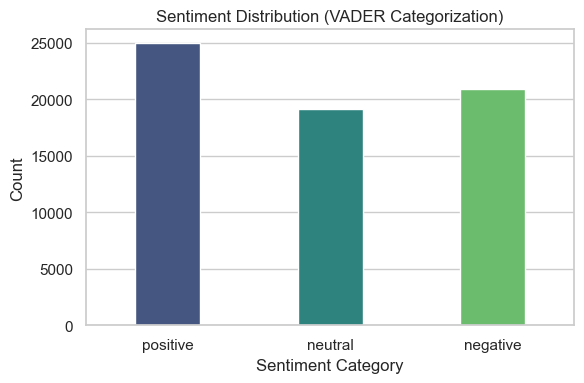

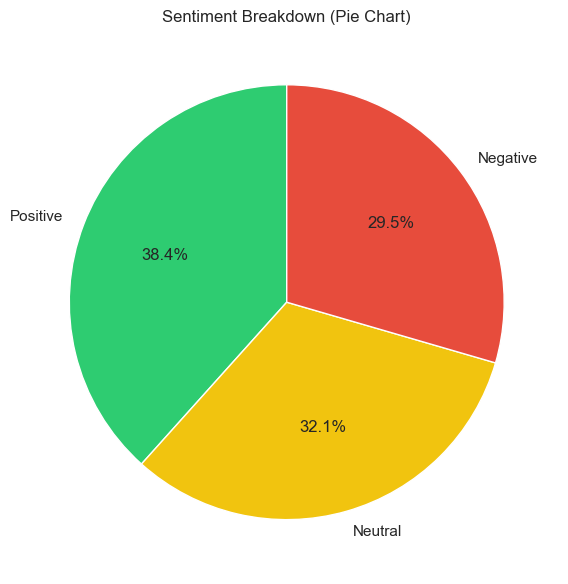

In [147]:
!pip install textblob

# Import necessary libraries
from textblob import TextBlob
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# Download VADER lexicon
nltk.download('vader_lexicon')

# Load the previously processed data
try:
    df = pd.read_csv('processed_finance_reddit_data.csv')
    print(f"Successfully loaded data with {len(df)} rows")
except FileNotFoundError:
    print("Error: Could not find processed_finance_reddit_data.csv")
    # If the file doesn't exist, you might want to load your original data
    # and perform the preprocessing steps first
    # df = pd.read_csv('finance_reddit_data.csv')
    # ... preprocessing code here ...

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# TextBlob sentiment
def get_textblob_sentiment(text):
    if isinstance(text, str):
        try:
            return TextBlob(text).sentiment.polarity
        except:
            print(f"Error processing text with TextBlob: {text[:50]}...")
            return 0
    return 0

# VADER sentiment
def get_vader_sentiment(text):
    if isinstance(text, str):
        try:
            return sia.polarity_scores(text)
        except:
            print(f"Error processing text with VADER: {text[:50]}...")
            return {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0}
    return {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0}

# Apply sentiment analysis with error handling
print("Calculating TextBlob sentiment...")
df['textblob_sentiment'] = df['clean_text'].apply(get_textblob_sentiment)

print("Calculating VADER sentiment...")
df['vader_sentiment'] = df['clean_text'].apply(get_vader_sentiment)
df['vader_compound'] = df['vader_sentiment'].apply(lambda x: x['compound'])

# Categorize sentiment
def categorize_sentiment(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_category'] = df['vader_compound'].apply(categorize_sentiment)

# Add sentiment distribution
sentiment_counts = df['sentiment_category'].value_counts()
print("\nSentiment Distribution:")
print(sentiment_counts)
print(f"Positive: {sentiment_counts.get('positive', 0) / len(df):.2%}")
print(f"Neutral: {sentiment_counts.get('neutral', 0) / len(df):.2%}")
print(f"Negative: {sentiment_counts.get('negative', 0) / len(df):.2%}")

# Calculate sentiment averages
print("\nAverage Sentiment Scores:")
print(f"TextBlob Average: {df['textblob_sentiment'].mean():.4f}")
print(f"VADER Compound Average: {df['vader_compound'].mean():.4f}")

# Save sentiment data
df.to_csv('sentiment_finance_reddit_data.csv', index=False)
print(f"\nData saved to 'sentiment_finance_reddit_data.csv' with {len(df)} rows")

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure visual style
sns.set(style="whitegrid")

# Create figure
plt.figure(figsize=(6, 4))

# --- Bar Chart ---
sns.countplot(
    x='sentiment_category',
    data=df,
    palette='viridis',
    order=['positive', 'neutral', 'negative'],
    width=0.4
)

plt.title('Sentiment Distribution (VADER Categorization)')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# --- Pie Chart of Sentiment Distribution ---
plt.figure(figsize=(6, 6))
df['sentiment_category'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['#2ecc71','#f1c40f','#e74c3c'], 
    labels=['Positive','Neutral','Negative']
)
plt.title('Sentiment Breakdown (Pie Chart)')
plt.ylabel('')
plt.tight_layout()
plt.show()